### Deliverable 1: Preprocessing the Data for a Neural Network

In [52]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [53]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.copy().drop(columns = ["EIN", "NAME"])
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [54]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [55]:
# Look at APPLICATION_TYPE value counts for binning
AT_counts = application_df["APPLICATION_TYPE"].value_counts()
AT_counts_filtered = AT_counts[AT_counts > 10]
AT_counts_filtered

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

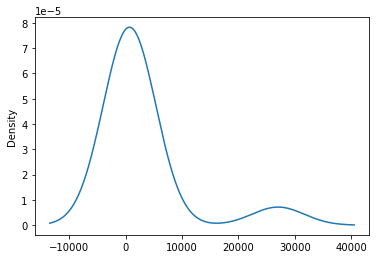

In [57]:
# Visualize the value counts of APPLICATION_TYPE
AT_counts_filtered.plot.density()

In [58]:
# Determine which values to replace if counts are less than ...?
replace_application = list(AT_counts[AT_counts < 200].index)
replace_application
# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [60]:
# Look at CLASSIFICATION value counts for binning
CL_counts = application_df["CLASSIFICATION"].value_counts()
CL_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<AxesSubplot:ylabel='Density'>

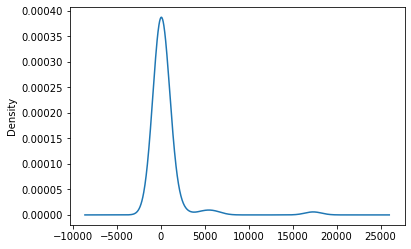

In [61]:
# Visualize the value counts of CLASSIFICATION
CL_counts.plot.density()

In [62]:
# Determine which values to replace if counts are less than ..?
replace_class = list(CL_counts[CL_counts < 1883].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [74]:
# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
application_cat

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [75]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [76]:
# Merge one-hot encoded features and drop the originals
Merge_df = application_df.merge(encode_df,left_index=True, right_index=True)
Merge_df = Merge_df.drop(application_cat,1)
Merge_df.head()

/var/folders/r2/5pp2k__9305_l57mznwmt09w0000gn/T/ipykernel_1294/3244043847.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  Merge_df = Merge_df.drop(application_cat,1)


,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [77]:
# Split our preprocessed data into our features and target arrays
y = Merge_df["IS_SUCCESSFUL"].values
X = Merge_df.drop(["IS_SUCCESSFUL"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

/var/folders/r2/5pp2k__9305_l57mznwmt09w0000gn/T/ipykernel_1294/1358400151.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = Merge_df.drop(["IS_SUCCESSFUL"],1).values


In [81]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
X_train_scaled

array([[ 0.01394306, -0.03348439, -0.08918651, ..., -0.06987849,
         0.02789425, -0.02789425],
       [ 0.01394306, -0.03348439, -0.08918651, ..., -0.06987849,
         0.02789425, -0.02789425],
       [ 0.01394306, -0.03348439, -0.08918651, ..., -0.06987849,
         0.02789425, -0.02789425],
       ...,
       [ 0.01394306, -0.03229417, -0.08918651, ..., -0.06987849,
         0.02789425, -0.02789425],
       [ 0.01394306, -0.03348439, -0.08918651, ..., -0.06987849,
         0.02789425, -0.02789425],
       [ 0.01394306, -0.01093629, -0.08918651, ..., -0.06987849,
         0.02789425, -0.02789425]])

### Deliverable 2: Compile, Train and Evaluate the Model

In [103]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 80
hidden_nodes_layer2 = 30

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_63 (Dense)            (None, 80)                3520      
                                                                 
 dense_64 (Dense)            (None, 30)                2430      
                                                                 
 dense_65 (Dense)            (None, 1)                 31        
                                                                 
Total params: 5,981
Trainable params: 5,981
Non-trainable params: 0
_________________________________________________________________


In [104]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [105]:
# Train the model
fit_model = nn.fit(X_train,y_train,epochs=100)

Epoch 1/100
804/804 [==============================] - 1s 898us/step - loss: 59986.6133 - accuracy: 0.4910
Epoch 2/100
804/804 [==============================] - 1s 894us/step - loss: 66626.2422 - accuracy: 0.5096
Epoch 3/100
804/804 [==============================] - 1s 873us/step - loss: 60395.3867 - accuracy: 0.5019
Epoch 4/100
804/804 [==============================] - 1s 901us/step - loss: 29733.4844 - accuracy: 0.5246
Epoch 5/100
804/804 [==============================] - 1s 904us/step - loss: 34257.8594 - accuracy: 0.5081
Epoch 6/100
804/804 [==============================] - 1s 897us/step - loss: 9018.9766 - accuracy: 0.5042
Epoch 7/100
804/804 [==============================] - 1s 904us/step - loss: 5806.1025 - accuracy: 0.4928
Epoch 8/100
804/804 [==============================] - 1s 895us/step - loss: 9302.4834 - accuracy: 0.5107
Epoch 9/100
804/804 [==============================] - 1s 924us/step - loss: 6004.5386 - accuracy: 0.5114
Epoch 10/100
804/804 [===================

Epoch 79/100
804/804 [==============================] - 1s 910us/step - loss: 0.6912 - accuracy: 0.5321
Epoch 80/100
804/804 [==============================] - 1s 882us/step - loss: 0.6913 - accuracy: 0.5321
Epoch 81/100
804/804 [==============================] - 1s 880us/step - loss: 0.6912 - accuracy: 0.5321
Epoch 82/100
804/804 [==============================] - 1s 940us/step - loss: 0.6912 - accuracy: 0.5321
Epoch 83/100
804/804 [==============================] - 1s 931us/step - loss: 0.6912 - accuracy: 0.5321
Epoch 84/100
804/804 [==============================] - 1s 926us/step - loss: 0.6912 - accuracy: 0.5321
Epoch 85/100
804/804 [==============================] - 1s 909us/step - loss: 0.6912 - accuracy: 0.5321
Epoch 86/100
804/804 [==============================] - 1s 941us/step - loss: 0.6912 - accuracy: 0.5321
Epoch 87/100
804/804 [==============================] - 1s 936us/step - loss: 0.6912 - accuracy: 0.5321
Epoch 88/100
804/804 [==============================] - 1s 927us

In [106]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 1.2599 - accuracy: 0.6835 - 238ms/epoch - 887us/step
Loss: 1.2599172592163086, Accuracy: 0.6834985613822937
